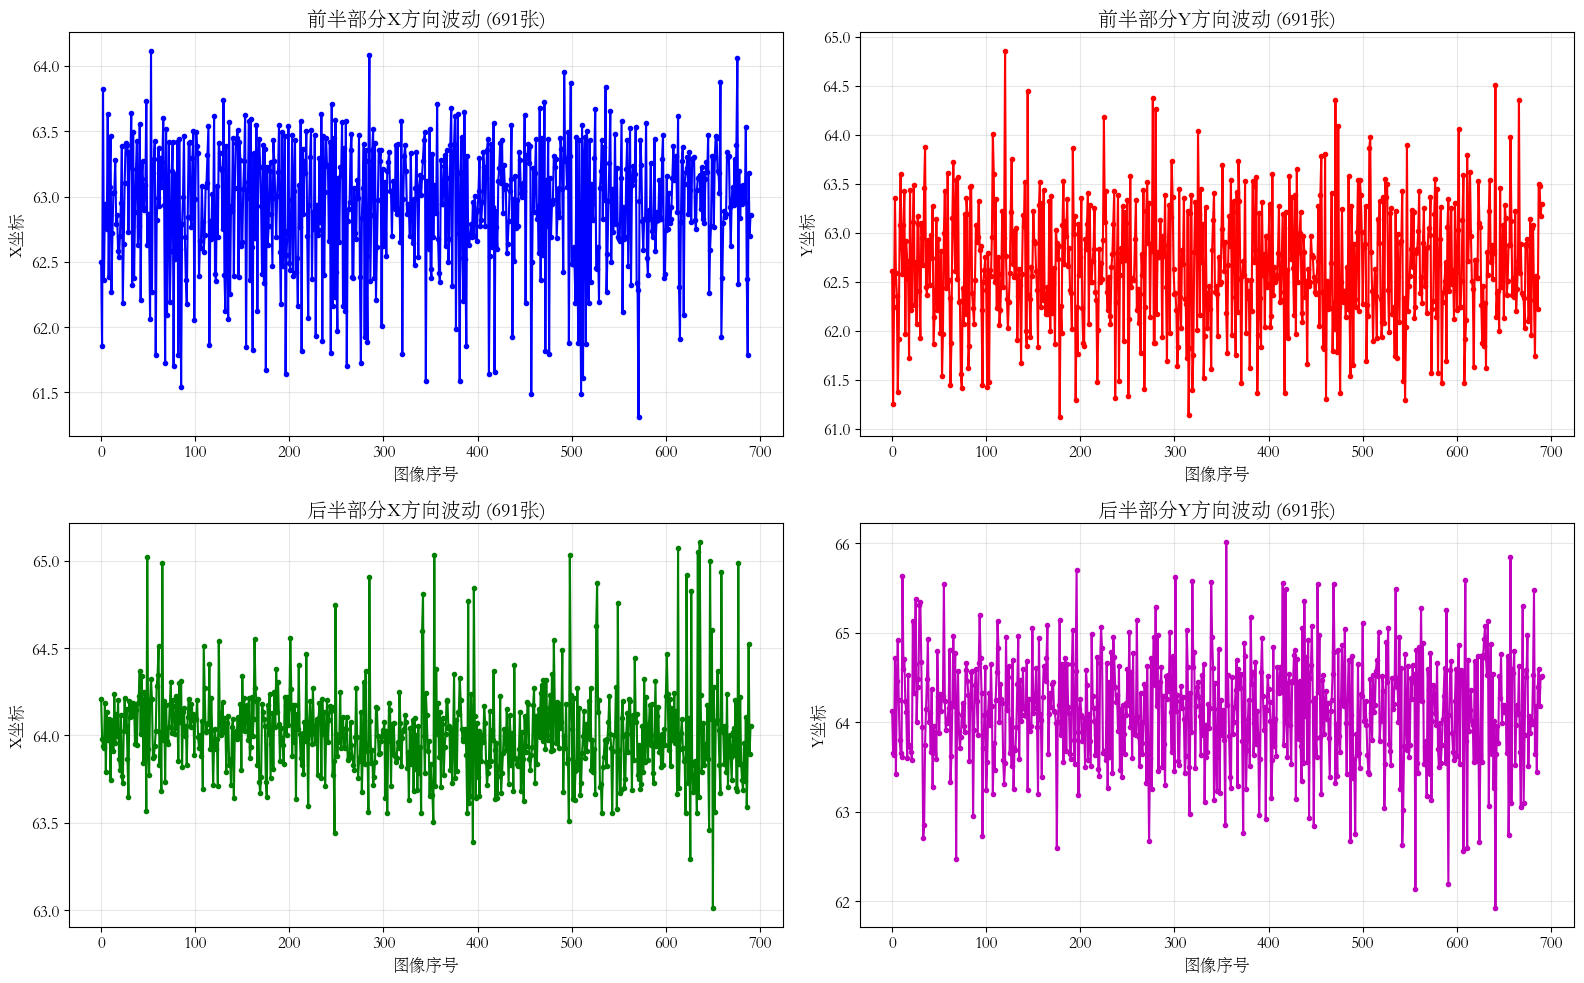


前半部分统计:
X均值: 62.92 ± 0.49
Y均值: 62.65 ± 0.61

后半部分统计:
X均值: 64.01 ± 0.26
Y均值: 64.13 ± 0.60


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.measure import regionprops
from skimage.filters import threshold_otsu

# 配置参数
IMAGE_DIR = r"D:\bead image\2pN_bead images\2pN-bead-image\2pN-bead-image"  # 修改为您的图像目录
FILE_EXTENSIONS = ('.png', '.jpg', '.tif', '.tiff')  # 支持的图像格式

def process_images(image_dir):
    """处理目录中的所有图像并返回质心坐标"""
    x_coords, y_coords = [], []
    valid_files = []
    
    for fname in sorted(os.listdir(image_dir)):
        if not fname.lower().endswith(FILE_EXTENSIONS):
            continue
            
        try:
            # 图像加载与预处理
            img_path = os.path.join(image_dir, fname)
            img = Image.open(img_path).convert('L')
            img_array = np.array(img)
            
            # 二值化处理
            thresh = threshold_otsu(img_array)
            binary = img_array > thresh
            
            # 质心计算
            props = regionprops(binary.astype(int))
            if len(props) == 0:
                print(f"警告: {fname} 未找到物体")
                continue
                
            y, x = props[0].centroid
            x_coords.append(x)
            y_coords.append(y)
            valid_files.append(fname)
            
        except Exception as e:
            print(f"处理 {fname} 时出错: {str(e)}")
    
    return x_coords, y_coords, valid_files

# ... 前面的处理函数保持不变 ...

# 修改执行处理部分和可视化部分
# 执行处理
x_vals, y_vals, valid_files = process_images(IMAGE_DIR)
total = len(valid_files)
half = total // 2

# 分割数据集
first_half = slice(0, half)
second_half = slice(half, None)

# 创建2x2子图布局
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# 前半部分分析
axs[0,0].plot(x_vals[first_half], 'b-', marker='o', markersize=3)
axs[0,0].set_title(f'前半部分X方向波动 ({half}张)')
axs[0,0].set_ylabel('X坐标')

axs[0,1].plot(y_vals[first_half], 'r-', marker='o', markersize=3)
axs[0,1].set_title(f'前半部分Y方向波动 ({half}张)')
axs[0,1].set_ylabel('Y坐标')

# 后半部分分析
axs[1,0].plot(x_vals[second_half], 'g-', marker='o', markersize=3)
axs[1,0].set_title(f'后半部分X方向波动 ({total-half}张)')
axs[1,0].set_ylabel('X坐标')

axs[1,1].plot(y_vals[second_half], 'm-', marker='o', markersize=3)
axs[1,1].set_title(f'后半部分Y方向波动 ({total-half}张)')
axs[1,1].set_ylabel('Y坐标')

# 统一设置公共标签
for ax in axs.flat:
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('图像序号')

plt.tight_layout()
plt.show()

# 添加分割后的统计信息
print("\n前半部分统计:")
print(f"X均值: {np.mean(x_vals[first_half]):.2f} ± {np.std(x_vals[first_half]):.2f}")
print(f"Y均值: {np.mean(y_vals[first_half]):.2f} ± {np.std(y_vals[first_half]):.2f}")

print("\n后半部分统计:")
print(f"X均值: {np.mean(x_vals[second_half]):.2f} ± {np.std(x_vals[second_half]):.2f}")
print(f"Y均值: {np.mean(y_vals[second_half]):.2f} ± {np.std(y_vals[second_half]):.2f}")

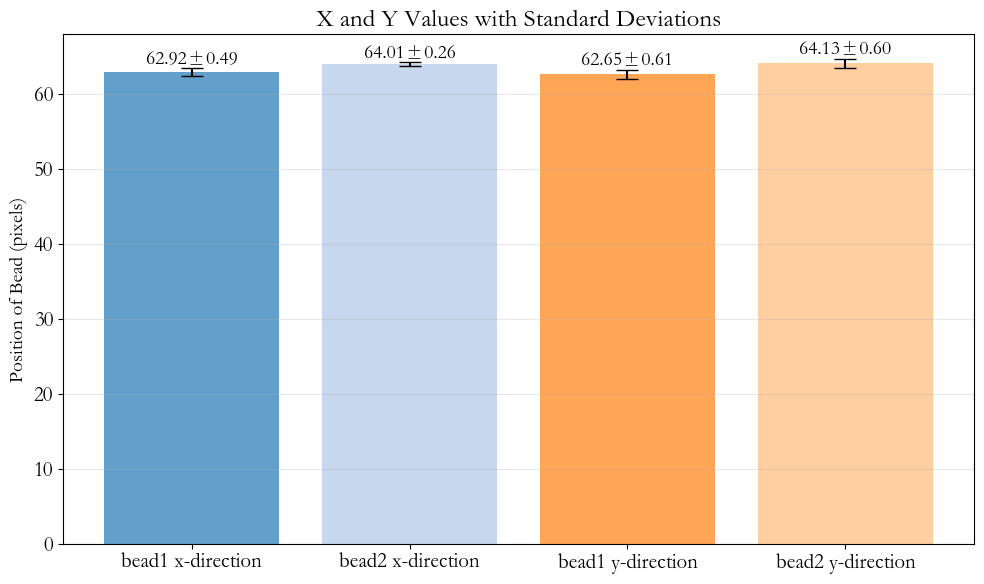

In [16]:
# 在现有代码后添加以下内容

# 准备统计值
means = [
    np.mean(x_vals[first_half]), np.mean(x_vals[second_half]),
    np.mean(y_vals[first_half]), np.mean(y_vals[second_half])
]
stds = [
    np.std(x_vals[first_half]), np.std(x_vals[second_half]),
    np.std(y_vals[first_half]), np.std(y_vals[second_half])
]
labels = ['bead1 x-direction', 'bead2 x-direction', 'bead1 y-direction', 'bead2 y-direction']

# 创建带误差条的柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, means, yerr=stds, 
              capsize=8, alpha=0.7,
              color=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])

# 添加数值标签
for bar, mean, std in zip(bars, means, stds):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + std,
            f'{mean:.2f}±{std:.2f}',
            ha='center', va='bottom',fontsize=14,  # 新增字体大小
            fontweight='bold')

plt.title('X and Y Values with Standard Deviations', fontsize=18)
plt.ylabel('Position of Bead (pixels)',fontsize=14)
plt.xticks(fontsize=15)  # 添加旋转防止重叠
plt.yticks(fontsize=15)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()